In [ ]:
! ls drive/MyDrive/

 acc-valacc-VGG16.png	  plant-data			    VGG16-summary.txt
 Alzheimers		 'plant-data (1)'		   'VGG16&VGG19.ipynb'
'Colab Notebooks'	  plant_disease_InceptionV3.ipynb   VGG16.zip
 evaluation.py		  __pycache__			    yield_gen.py
 __init__.py		  VGG16.h5
 loss_valloss-VGG16.png   VGG16-stats.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from drive.MyDrive.evaluation import * 
from drive.MyDrive.yield_gen import *

In [ ]:
docs()



    * functions
        - generator() : arguments gen_type = ( with-aug | with-augmentation ) & host = ( local | colab )

    * usage 
    
        from yield_gen import * 
        train, valid, test = generator(gen_type="with-aug", host="colab") # returns a tf.generator object with data

    * requirements
    
        - local data directory structure
            ./plant-data
                /Train
                    /Train
                        ..samples
                /Test
                    /Test
                        ..samples 
                /Validation
                    /Validation
                        ..samples
        
        - Colab data directory structure 
            ./drive
                ./MyDrive
                    /plant-data
                        /Train
                            /Train
                                ..samples
                        /Test
                            /Test
                                ..samples 
             

In [ ]:
a_train, a_valid, a_test = generator("with-aug",'colab')

Colab Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [ ]:
import pandas as pd 
from tensorflow.keras.applications import VGG16, VGG19
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout

In [ ]:
conv_base = VGG19(input_shape=a_train.image_shape, include_top=False, weights='imagenet')

In [ ]:
conv_base.trainable

True

In [ ]:
conv_base.trainable= False 

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 24,219,203
Trainable params: 4,194,819
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import time

start = time.perf_counter()

perf = model.fit_generator(a_train, epochs=15, callbacks=[early_stop],validation_data=a_valid)

elapsed = time.perf_counter()- start 

print('Elapsed {}'.format(elapsed/60))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
42/42 [==============================] - 759s 17s/step - loss: 1.4594 - accuracy: 0.5809 - val_loss: 0.5902 - val_accuracy: 0.7810
Epoch 2/15
42/42 [==============================] - 201s 5s/step - loss: 0.5846 - accuracy: 0.7481 - val_loss: 0.5618 - val_accuracy: 0.8381
Epoch 3/15
42/42 [==============================] - 200s 5s/step - loss: 0.5491 - accuracy: 0.7579 - val_loss: 0.5437 - val_accuracy: 0.8190
Epoch 4/15
42/42 [==============================] - 202s 5s/step - loss: 0.4940 - accuracy: 0.7935 - val_loss: 0.4590 - val_accuracy: 0.8476
Epoch 5/15
42/42 [==============================] - 200s 5s/step - loss: 0.4269 - accuracy: 0.8321 - val_loss: 0.3771 - val_accuracy: 0.8762
Epoch 6/15
42/42 [==============================] - 199s 5s/step - loss: 0.4067 - accuracy: 0.8313 - val_loss: 0.3131 - val_accuracy: 0.8952
Epoch 7/15
42/42 [==============================] - 201s 5s/step - loss: 0.3529 - accuracy: 0.8555 - val_loss: 0.3302 - val_accuracy: 0.9048
Epoch 8/15
4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation Accuracy - 87.62%
validation loss - 0.38
Test Accuracy - 86.67%
Test loss - 0.34
preserving records
VGG19 Records Created


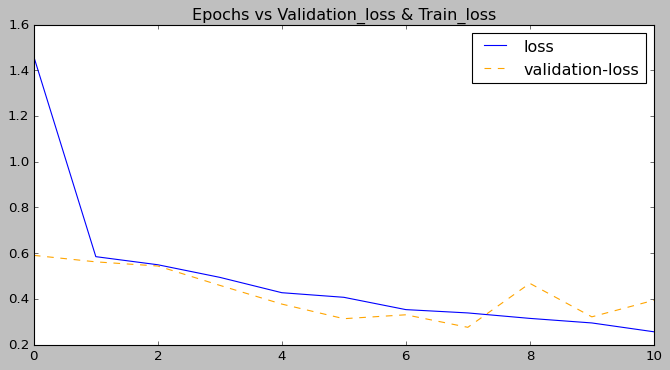

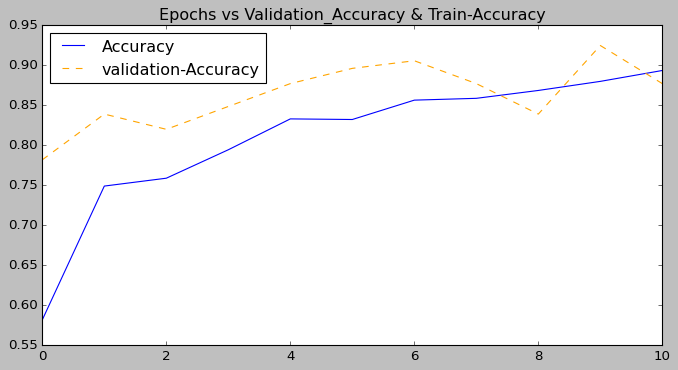

In [ ]:
histdata = pd.DataFrame(perf.history)
evaluate_model('VGG19', model, a_valid, a_test, histdata, elapsed)

In [ ]:
! ls drive/MyDrive/

 acc-valacc-VGG16.png	  plant-data			    VGG16.zip
 acc-valacc-VGG19.png	 'plant-data (1)'		    VGG19.h5
 Alzheimers		  plant_disease_InceptionV3.ipynb   VGG19-stats.csv
'Colab Notebooks'	  __pycache__			    VGG19-summary.txt
 evaluation.py		  VGG16.h5			    VGG19.zip
 __init__.py		  VGG16-stats.csv		    yield_gen.py
 loss_valloss-VGG16.png   VGG16-summary.txt
 loss_valloss-VGG19.png  'VGG16&VGG19.ipynb'


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/VGG19.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>